<a href="https://colab.research.google.com/github/faridamousa23/Level-3-Advanced-/blob/main/Task_1_Predictive_Modeling_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py

                     Accuracy  Precision  Recall   F1
Logistic Regression  0.333333        0.0     0.0  0.0
Decision Tree        0.333333        0.0     0.0  0.0
Random Forest        0.333333        0.0     0.0  0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metr


Best Parameters for Random Forest: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best F1-Score: 0.0


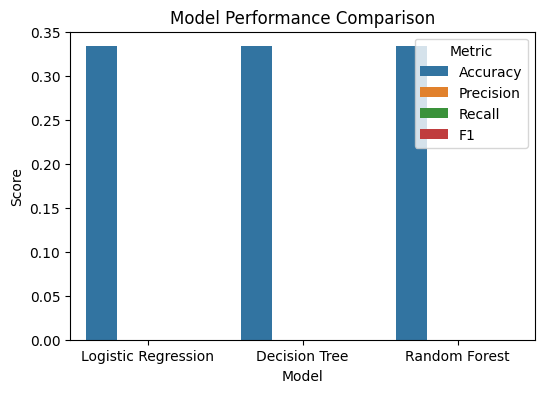

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    "Age": [25, 45, 39, 50, 23, 31, 60, 48, 29, 41],
    "Income": [50000, 64000, 58000, 72000, 40000, 52000, 83000, 67000, 45000, 61000],
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female", "Female", "Male", "Female", "Male"],
    "Tenure": [1, 5, 3, 8, 1, 2, 10, 6, 2, 4],
    "Churn": [0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)


le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])


X = df.drop("Churn", axis=1)
y = df["Churn"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }


results_df = pd.DataFrame(results).T
print(results_df)


param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [2, 4, 6, None],
    "min_samples_split": [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="f1")
grid.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", grid.best_params_)
print("Best F1-Score:", grid.best_score_)


plt.figure(figsize=(6,4))
sns.barplot(data=results_df.reset_index().melt(id_vars="index"),
            x="index", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()
